In [341]:
# pandas haversine 불러오기
import pandas as pd
from haversine import haversine

In [13]:
# 서울지역의 꿈나무카드 가맹점과 착한가격 그리고 서울 초중고등학교 위치데이터 불러오기

seoul_ga=pd.read_csv('C:\\Users\\user\\Desktop\\데이터\\정제\\서울_자치구_가맹점.csv',encoding='euc-kr')
seoul_cha=pd.read_csv('C:\\Users\\user\\Downloads\\data\\서울시_착한.csv',encoding='euc-kr')
seoul_cho=pd.read_csv('C:\\Users\\user\\Downloads\\data\\서울시_초중고.csv',encoding='euc-kr')

In [14]:
seoul_ga

,가맹점명,업종명,전화,가맹점주소,자치구,경도,위도
0,국수나무창신점,한식,27479340.0,서울 종로구 지봉로 81 104호,종로구,127.015049,37.577375
1,김밥천국,한식,27354146.0,"서울 종로구 통일로 262, 1층 （무악동）",종로구,126.957025,37.575507
2,꾸스꾸스,양식,263575762.0,서울 종로구 자하문로5길 16-2 （체부동）,종로구,126.971144,37.577852
3,나주식당,한식,27650509.0,서울 종로구 지봉로14길 8-1 지상1층,종로구,127.015885,37.578118
4,뚜레쥬르 창신점,제과점,27645638.0,서울 종로구 지봉로 91-1 （창신동）,종로구,127.015203,37.578392
...,...,...,...,...,...,...,...
1848,행복가득찬,식품잡화,24742881.0,서울 강동구 구천면로34길 17 1층,강동구,127.132169,37.542460
1849,행복한밥상,한식,24265686.0,서울 강동구 고덕로 133 지하층 1023호,강동구,127.140347,37.555253
1850,홍짜장,중식,24700518.0,"서울 강동구 양재대로116길 16, 104호 （길동, 고려빌딩）",강동구,127.141196,37.538407
1851,홍짜장,한식,24487720.0,"서울 강동구 구천면로 418, 1층 （명일동）",강동구,127.145030,37.550514


In [15]:
# 초중고등학교가 500m안에 얼마나 있는지 거리계산 (갯수)

seoul_ga['초중고_in_500']=0

In [17]:
for j in range(0, len(seoul_ga)):
    for i in range(0, len(seoul_cho)):
        lon = seoul_ga['경도'][j]
        lat = seoul_ga['위도'][j]
        lon2 = seoul_cho['경도'].reset_index(drop=True)[i]
        lat2 = seoul_cho['위도'].reset_index(drop=True)[i]
        a = (lat, lon)
        b = (lat2, lon2)
        c = haversine(a, b) * 1000
        if c <= 500:
             seoul_ga['초중고_in_500'][j] +=1

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [20]:
seoul_cha['초중고_in_500']=0

for j in range(0, len(seoul_cha)):
    for i in range(0, len(seoul_cho)):
        lon = seoul_cha['경도'][j]
        lat = seoul_cha['위도'][j]
        lon2 = seoul_cho['경도'].reset_index(drop=True)[i]
        lat2 = seoul_cho['위도'].reset_index(drop=True)[i]
        a = (lat, lon)
        b = (lat2, lon2)
        c = haversine(a, b) * 1000
        if c <= 500:
             seoul_cha['초중고_in_500'][j] +=1

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [23]:
# 서울시 버스정류장 위치데이터 불러오기

seoul_bus=pd.read_excel('C:\\Users\\user\\Downloads\\data\\서울시 버스정류소 위치 데이터(20180502).xls')

In [25]:
seoul_bus

,정류소번호,정류소명,X좌표,Y좌표
0,1001,종로2가사거리,126.987750,37.569765
1,1002,창경궁.서울대학교병원,126.996566,37.579183
2,1003,명륜3가.성대입구,126.998340,37.582671
3,1004,종로2가.삼일교,126.987613,37.568579
4,1005,혜화동로터리,127.001744,37.586243
...,...,...,...,...
11013,25783,명일동국민은행,127.144162,37.553791
11014,25784,명일동국민은행,127.144451,37.553675
11015,25988,고덕2단지,127.162899,37.560222
11016,25989,고덕초등학교,127.165433,37.560009


In [31]:
# 착한가격업소 주변 500m안에 버스정류장이 얼마나 있나 거리계산(갯수)

seoul_cha['버스_거리']=0

for j in range(0, len(seoul_cha)):
    for i in range(0, len(seoul_bus)):
        lon = seoul_cha['경도'][j]
        lat = seoul_cha['위도'][j]
        lon2 = seoul_bus['X좌표'].reset_index(drop=True)[i]
        lat2 = seoul_bus['Y좌표'].reset_index(drop=True)[i]
        a = (lat, lon)
        b = (lat2, lon2)
        c = haversine(a, b) * 1000
        if c <= 500:
             seoul_cha['버스_거리'][j] +=1

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [40]:
# 꿈나무카드 가맹점 주변 500m안에 버스정류장이 얼마나 있나 거리계산(갯수)

seoul_ga['버스_거리']=0

for j in range(0, len(seoul_ga)):
    for i in range(0, len(seoul_bus)):
        lon = seoul_ga['경도'][j]
        lat = seoul_ga['위도'][j]
        lon2 = seoul_bus['X좌표'].reset_index(drop=True)[i]
        lat2 = seoul_bus['Y좌표'].reset_index(drop=True)[i]
        a = (lat, lon)
        b = (lat2, lon2)
        c = haversine(a, b) * 1000
        if c <= 500:
             seoul_ga['버스_거리'][j] +=1

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [42]:
# 서울시 지역아동센터 위치데이터 불러오기

seoul_jad=pd.read_csv('C:\\Users\\user\\Downloads\\data\\서울시_지역아동센터.csv',encoding='euc-kr')

In [44]:
# 착한가격업소 주변 500m안에 버스정류장이 얼마나 있나 거리계산(갯수)

seoul_cha['지역아동_in_500']=0

for j in range(0, len(seoul_cha)):
    for i in range(0, len(seoul_jad)):
        lon = seoul_cha['경도'][j]
        lat = seoul_cha['위도'][j]
        lon2 = seoul_jad['경도'].reset_index(drop=True)[i]
        lat2 = seoul_jad['위도'].reset_index(drop=True)[i]
        a = (lat, lon)
        b = (lat2, lon2)
        c = haversine(a, b) * 1000
        if c <= 500:
             seoul_cha['지역아동_in_500'][j] +=1

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [46]:
# 꿈나무카드 가맹점  주변 500m안에 버스정류장이 얼마나 있나 거리계산(갯수)

seoul_ga['지역아동_in_500']=0

for j in range(0, len(seoul_ga)):
    for i in range(0, len(seoul_jad)):
        lon = seoul_ga['경도'][j]
        lat = seoul_ga['위도'][j]
        lon2 = seoul_jad['경도'].reset_index(drop=True)[i]
        lat2 = seoul_jad['위도'].reset_index(drop=True)[i]
        a = (lat, lon)
        b = (lat2, lon2)
        c = haversine(a, b) * 1000
        if c <= 500:
             seoul_ga['지역아동_in_500'][j] +=1

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [65]:
# 업종명 통일 필요

seoul_ga['업종명'].unique()

array(['한식', '양식', '제과점', '일반대중음식', '중식', '식품잡화', '생활잡화', '일식', '패스트푸드',
       '농가공산품', '할인점/슈퍼마켓', '식품류제조업', '남.여기성복', '커피전문점', '농수산물', '기타6',
       '서적', '연쇄점', '모텔,여관,기타숙박'], dtype=object)

In [67]:
seoul_ga['업종명'].value_counts()

한식            687
제과점           435
중식            365
일반대중음식        223
패스트푸드          44
식품잡화           31
양식             28
할인점/슈퍼마켓       11
일식             10
식품류제조업          7
기타6             3
농가공산품           2
생활잡화            1
농수산물            1
커피전문점           1
서적              1
모텔,여관,기타숙박      1
남.여기성복          1
연쇄점             1
Name: 업종명, dtype: int64

In [66]:
seoul_cha['업종'].unique()

array(['한식', '분식', '간이음식', '중식', '돈까스', '일반음식점', '일식', '경양식'],
      dtype=object)

In [56]:
# 전처리하기 위해 csv로 내보내기

seoul_ga.to_csv('C:\\Users\\user\\Downloads\\data\\seoul_ga.csv',encoding='euc-kr')
seoul_cha.to_csv('C:\\Users\\user\\Downloads\\data\\seoul_cha.csv',encoding='euc-kr')

In [73]:
# 주변의 유흥업소가 있는지 확인하기 위해 상권 데이터 불러오기

data=pd.read_csv('C:\\Users\\user\\Downloads\\상가(상권)정보_201912. (1)\\상가.csv',engine='python',encoding='utf-8')

In [92]:
# 전국 데이터이므로 서울특별시만 추출

data2=data[data['시도명']=='서울특별시'].unique()

In [96]:
data[data['시도명']=='서울특별시']['상권업종중분류명'].unique()

array(['유흥주점', '커피점/카페', '대중목욕탕/휴게', '일식/수산물', '패스트푸드', '분식', '한식',
       '음/식료품소매', '건강/미용식품', '선물/팬시/기념품', '중식', '양식', '병원', '화장품소매',
       '의복의류', 'PC/오락/당구/볼링등', '별식/퓨전요리', '학원-자격/국가고시', '가정/주방/인테리어',
       '무도/유흥/가무', '학원-어학', '사진/광학/정밀기기소매', '책/서적/도서', '예식/의례/관혼상제',
       '이/미용/건강', '학원-음악미술무용', '학원-예능취미체육', '운송/배달/택배', '광고/인쇄', '기타음식업',
       '부동산중개', '주유소/충전소', '철물/난방/건설자재소매', '사무/문구/컴퓨터', '약국/한약방', '유아교육',
       '물품기기대여', '자동차/이륜차', '자동차/자동차용품', '개인/가정용품수리', '학원-보습교습입시', '학원기타',
       '시계/귀금속소매', '사진', '학문교육기타', '대행업', '종합소매점', '주택수리', '기타판매업',
       '중고품소매/교환', '인력/고용/용역알선', '음식배달서비스', '유사의료업', '개인서비스', '학원-컴퓨터',
       '도서관/독서실', '기타서비스업', '운동/경기용품소매', '장례/묘지', '가방/신발/액세서리', '법무세무회계',
       '취미/오락관련소매', '연극/영화/극장', '평가/개발/관리', '세탁/가사서비스', '수의업', '호텔/콘도',
       '모텔/여관/여인숙', '분양', '제과제빵떡케익', '학원-창업취업취미', '행사/이벤트', '가전제품소매',
       '요가/단전/마사지', '유아용품', '닭/오리요리', '경마/경륜/성인오락', '의약/의료품소매',
       '페인트/유리제품소매', '예술품/골동품/수석/분재', '부페', '가구소매', '의료관련서비스업', '스포츠/운동',
       

In [107]:
# 아동이 가면 유해한곳을 선정후 하나의 데이터로 합침

data3=data2[data2['상권업종중분류명']=='유흥주점']
data4=data2[data2['상권업종중분류명']=='경마/경륜/성인오락']
data5=data2[data2['상권업종중분류명']=='모텔/여관/여인숙']
seoul_uh=pd.concat([data3,data4])
seoul_uh=pd.concat([seoul_uh,data5])

In [109]:
seoul_uh

,상권업종중분류명,시도명,시군구명,법정동명,경도,위도
0,유흥주점,서울특별시,강남구,대치동,127.061026,37.493922
2,유흥주점,서울특별시,금천구,독산동,126.899220,37.471711
41,유흥주점,서울특별시,광진구,군자동,127.078519,37.556602
54,유흥주점,서울특별시,성동구,도선동,127.034540,37.562441
58,유흥주점,서울특별시,종로구,관철동,126.984915,37.569323
...,...,...,...,...,...,...
572482,모텔/여관/여인숙,서울특별시,종로구,관철동,126.985983,37.569071
572878,모텔/여관/여인숙,서울특별시,종로구,효제동,127.004190,37.572109
572938,모텔/여관/여인숙,서울특별시,구로구,가리봉동,126.886746,37.482704
573290,모텔/여관/여인숙,서울특별시,동대문구,장안동,127.069748,37.570211


In [111]:
# 착한가격업소 주변 500m안에 버스정류장이 얼마나 있나 거리계산(갯수)

seoul_cha['유흥_in_500']=0

for j in range(0, len(seoul_cha)):
    for i in range(0, len(seoul_uh)):
        lon = seoul_cha['경도'][j]
        lat = seoul_cha['위도'][j]
        lon2 = seoul_uh['경도'].reset_index(drop=True)[i]
        lat2 = seoul_uh['위도'].reset_index(drop=True)[i]
        a = (lat, lon)
        b = (lat2, lon2)
        c = haversine(a, b) * 1000
        if c <= 500:
             seoul_cha['유흥_in_500'][j] +=1

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [112]:
# 꿈나무카드 가맹점  주변 500m안에 버스정류장이 얼마나 있나 거리계산(갯수)

seoul_ga['유흥_in_500']=0

for j in range(0, len(seoul_ga)):
    for i in range(0, len(seoul_uh)):
        lon = seoul_ga['경도'][j]
        lat = seoul_ga['위도'][j]
        lon2 = seoul_uh['경도'].reset_index(drop=True)[i]
        lat2 = seoul_uh['위도'].reset_index(drop=True)[i]
        a = (lat, lon)
        b = (lat2, lon2)
        c = haversine(a, b) * 1000
        if c <= 500:
             seoul_ga['유흥_in_500'][j] +=1

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [4]:
seoul_ga=pd.read_csv('C:\\Users\\user\\Downloads\\data\\seoul_ga.csv',encoding='euc-kr')
seoul_cha=pd.read_csv('C:\\Users\\user\\Downloads\\data\\seoul_cha.csv',encoding='euc-kr')  

# 음식_선호도 , 카드_전체_사용자중에_해당구_비율 엑셀로 전처리후 불러옴

In [5]:
# 데이터 전체의 스케일을 맞춰주기위해 minmax_scaler 불러오기

from sklearn.preprocessing import MinMaxScaler

In [6]:
# 전체 데이터에서 스케일을 맞춰줘야하므로 착한가격업소와 꿈나무카드 가맹점 데이터 합치고 다시 나눠줌

minmax=MinMaxScaler()
con_ga_cha=pd.concat([seoul_ga[['초중고_in_500','버스_in_500','지역아동_in_500','유흥_in_500']],
                      seoul_cha[['초중고_in_500','버스_in_500','지역아동_in_500','유흥_in_500']]])

con_ga_cha_sc=minmax.fit_transform(con_ga_cha)
con_ga_cha_sc=pd.DataFrame(con_ga_cha_sc,columns=['초중고_in_500','버스_in_500','지역아동_in_500','유흥_in_500'])

seoul_ga_sc=con_ga_cha_sc[:1852]
seoul_cha_sc=con_ga_cha_sc[1852:]

In [7]:
# 스케일 된거에서 스케일 안된것들을 붙임

seoul_ga_sc['음식_선호도']=seoul_ga['음식_선호도']
seoul_ga_sc['카드_전체_사용자중에_해당구_비율']=seoul_ga['카드_전체_사용자중에_해당구_비율']

seoul_cha_sc=seoul_cha_sc.reset_index()
seoul_cha_sc['음식_선호도']=seoul_cha['음식_선호도']
seoul_cha_sc['카드_전체_사용자중에_해당구_비율']=seoul_cha['카드_전체_사용자중에_해당구_비율']
del seoul_cha_sc['index']

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# 모델을 세우기전 꿈나무카드 가맹점 데이터에서 훈련데이터외 검증 데이터를 나눔

from sklearn.model_selection import train_test_split
import numpy as np

seoul_ga_sc['점수']=seoul_ga_sc[['초중고_in_500','버스_in_500','지역아동_in_500']].sum(axis=1)
seoul_ga_sc['점수']=seoul_ga_sc['점수']-seoul_ga_sc['유흥_in_500']


seoul_ga_sc_tr, seoul_ga_sc_te = train_test_split(seoul_ga_sc, test_size=0.2, random_state=123)


seoul_ga_sc_tr_y=seoul_ga_sc_tr['점수']
seoul_ga_sc_te_y=seoul_ga_sc_te['점수']
del seoul_ga_sc_tr['점수']
del seoul_ga_sc_te['점수']

# seoul_ga_sc_tr :train , seoul_ga_sc_tr_y : train의 정답
# seoul_ga_sc_te :test , seoul_ga_sc_te_y : test의 정답

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


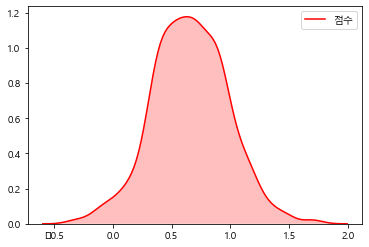

In [181]:
# 정답 테이블에 대한 정규성을 확인함

import seaborn as sns
from matplotlib import font_manager,rc
font_location='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
sns.kdeplot(y,shade=True,color='r') # y값의 정규성확인

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


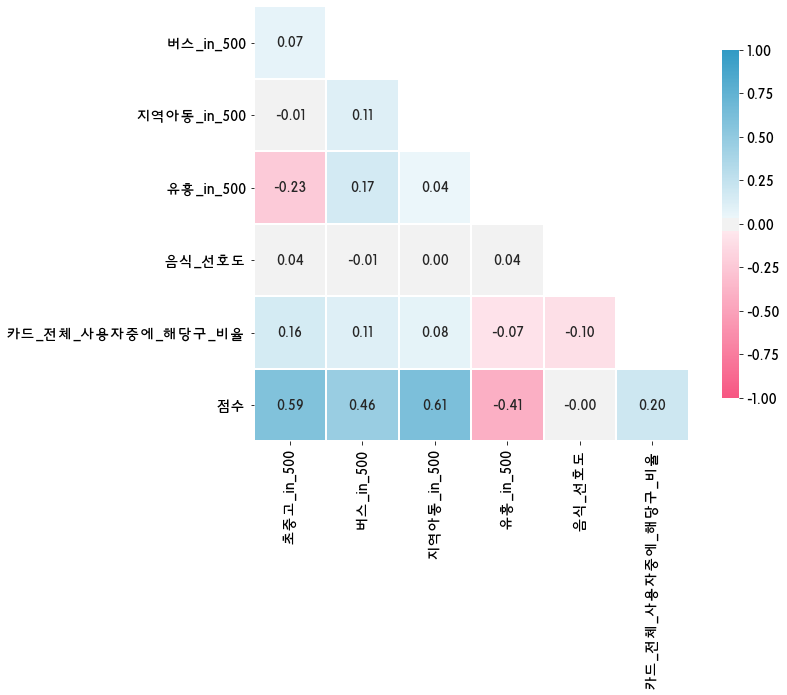

<Figure size 432x288 with 0 Axes>

In [359]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import numpy as np
import seaborn as sns
seoul_ga_sc['점수']=y
mask = np.triu(np.ones_like(seoul_ga_sc.corr(), dtype=np.bool))
mask = mask[1:, :-1]
font_location='C:/Windows/Fonts/HYKANB.TTF'
font_name=font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
f,ax=plt.subplots(figsize=(12,8))
cmap=sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
corr = seoul_ga_sc.corr().iloc[1:,:-1].copy()
sns.heatmap(corr,annot=True, square=True, fmt = '.2f', linewidths=.8, cmap=cmap ,ax=ax,vmin = -1, vmax = 1,
           cbar_kws={"shrink": .8},mask=mask)
plt.rcParams.update({'font.size': 15})
plt.show()
plt.savefig('fig1.png')

# 다른 변수들끼리는 상관성이 거의 없다

# 점수와 변수들끼리는 상관성이 보이는 변수가 있다.
# 500m안에 초중고,버스, 지역아동센터,유흥의 갯수가 어느정도 영향이 있는거 같다

In [375]:
# 점수를 예측하는 것이므로 regression모델을 선택
# 선형회귀,gb회귀,rf회귀,xgb회귀

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# k-fold를 진행하기 위한 함수 생성 (k=10)

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)

model_list=['Ridge','Lasso','GradientBoostingRegressor','RandomForestRegressor','XGBRegressor']

model_list_fit=[Ridge(),
                Lasso(),
                GradientBoostingRegressor(),
                RandomForestRegressor(),
                XGBRegressor()]



def model(model_name):
    model = model_name.fit(seoul_ga_sc_tr,seoul_ga_sc_tr_y)
    cv = KFold(10, shuffle=True, random_state=0)
    cv_r2=cross_val_score(model,seoul_ga_sc_te ,seoul_ga_sc_te_y , scoring="r2", cv=cv)
    return cv_r2

In [376]:
# 모델 별로 k-fold 진행

model_r2=pd.DataFrame()
for i in range(len(model_list)):
    model_r2[model_list[i]]=model(model_list_fit[i])

In [377]:
model_r2

,Ridge,Lasso,GradientBoostingRegressor,RandomForestRegressor,XGBRegressor
0,0.982195,-0.003279,0.947465,0.887075,0.919065
1,0.990219,-0.086129,0.883742,0.830677,0.839482
2,0.985370,-0.046242,0.957120,0.886894,0.916392
3,0.988596,-0.032536,0.973899,0.954027,0.956978
4,0.987010,-0.012753,0.968416,0.914871,0.958079
5,0.988446,-0.068629,0.967783,0.919935,0.947168
6,0.986465,-0.001446,0.983292,0.950753,0.978605
7,0.986549,-0.019173,0.984517,0.929773,0.959630
8,0.983032,-0.060345,0.964181,0.928112,0.924849
9,0.989940,-0.007046,0.966804,0.948552,0.951195


In [378]:
# 데이터 전처리를 위해 csv로 내보내고 전처리후 불러오기

model_r2.to_csv('model_r2.csv',encoding='euc-kr')


In [379]:
model_r2=pd.read_csv('model_r2.csv',encoding='euc-kr')

In [380]:
# k-fold 한것에 대한 각 알고리즘별 r2 평균

pd.DataFrame(model_r2.groupby(['model_name'])['r2'].mean()).reset_index().sort_values(by=['r2'],ascending=False)

,model_name,r2
3,Ridge,0.986782
0,GradientBoostingRegressor,0.959722
4,XGBRegressor,0.935144
2,RandomForestRegressor,0.915067
1,Lasso,-0.033758


In [385]:
# Lasso 의 값이 너무 작으므로 제거하고 시작한다

model_r2=model_r2[model_r2['model_name']!='Lasso']

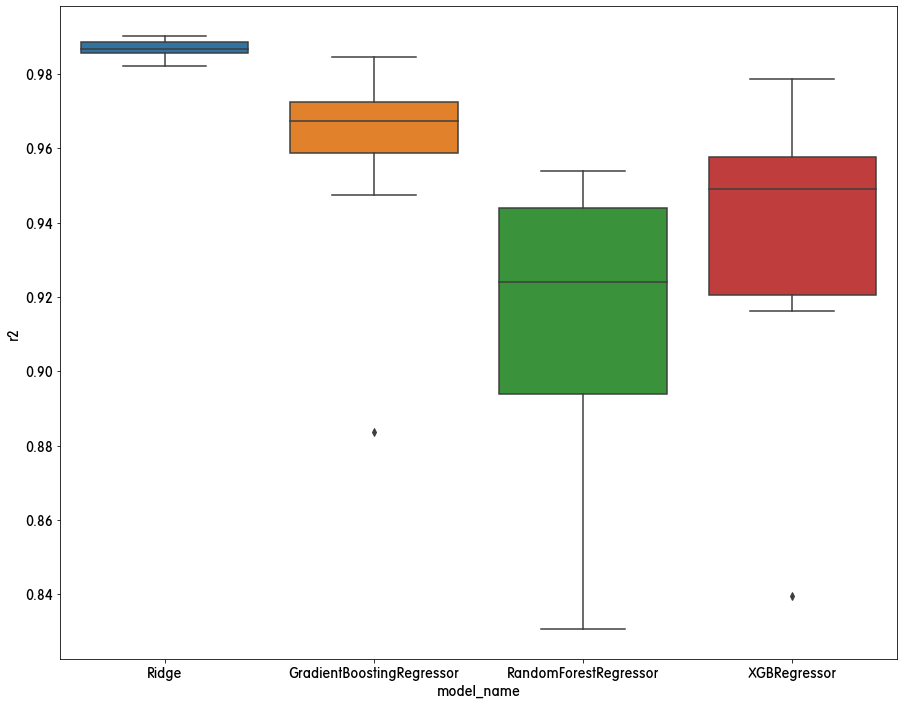

In [386]:
# r2 값에 대한 boxplot

f,ax=plt.subplots(figsize=(15,12))
sns.boxplot(model_r2['model_name'],model_r2['r2'])

# 평가

### ->모델에 대한 평가 진행 평가기준은 RMSE , MAPE

In [400]:
#rmse

from sklearn.metrics import mean_squared_error

# Ridge
model_list_fit[0].fit(seoul_ga_sc_tr,seoul_ga_sc_tr_y)
Ridge_prd=model_list_fit[0].predict(seoul_ga_sc_te)
Ridge_rmse=mean_squared_error(seoul_ga_sc_te_y,Ridge_prd )**0.5

# GradientBoostingRegressor
model_list_fit[2].fit(seoul_ga_sc_tr,seoul_ga_sc_tr_y)
GradientBoostingRegressor_prd=model_list_fit[2].predict(seoul_ga_sc_te)
GradientBoostingRegressor_rmse=mean_squared_error(seoul_ga_sc_te_y,GradientBoostingRegressor_prd )**0.5

# RandomForestRegressor
model_list_fit[3].fit(seoul_ga_sc_tr,seoul_ga_sc_tr_y)
RandomForestRegressor_prd=model_list_fit[3].predict(seoul_ga_sc_te)
RandomForestRegressor_rmse=mean_squared_error(seoul_ga_sc_te_y,RandomForestRegressor_prd )**0.5

# XGBRegressor
model_list_fit[4].fit(seoul_ga_sc_tr,seoul_ga_sc_tr_y)
XGBRegressor_prd=model_list_fit[4].predict(seoul_ga_sc_te)
XGBRegressor_rmse=mean_squared_error(seoul_ga_sc_te_y,XGBRegressor_prd )**0.5

print('Ridge_rmse :',Ridge_rmse)
print('GradientBoostingRegressor_rmse :',GradientBoostingRegressor_rmse)
print('RandomForestRegressor_rmse :',RandomForestRegressor_rmse)
print('XGBRegressor_rmse :',XGBRegressor_rmse)



Ridge_rmse : 0.008309549244827004
GradientBoostingRegressor_rmse : 0.03862321264062731
RandomForestRegressor_rmse : 0.056443104209959176
XGBRegressor_rmse : 0.045780268943572344


## RMSE로는 Ridge가 가장 오차가 없다.
#### 1) Ridge
#### 2) GradientBoostingRegressor
#### 3) XGBRegressor
#### 4) RandomForestRegressor
#### RMSE가 낮은 순서이다

In [401]:
# mape

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Ridge
model_list_fit[0].fit(seoul_ga_sc_tr,seoul_ga_sc_tr_y)
Ridge_prd=model_list_fit[0].predict(seoul_ga_sc_te)
Ridge_mape=100-mean_absolute_percentage_error(seoul_ga_sc_te_y,Ridge_prd )**0.5

# GradientBoostingRegressor
model_list_fit[2].fit(seoul_ga_sc_tr,seoul_ga_sc_tr_y)
GradientBoostingRegressor_prd=model_list_fit[2].predict(seoul_ga_sc_te)
GradientBoostingRegressor_mape=100-mean_absolute_percentage_error(seoul_ga_sc_te_y,GradientBoostingRegressor_prd )**0.5

# RandomForestRegressor
model_list_fit[3].fit(seoul_ga_sc_tr,seoul_ga_sc_tr_y)
RandomForestRegressor_prd=model_list_fit[3].predict(seoul_ga_sc_te)
RandomForestRegressor_mape=100-mean_absolute_percentage_error(seoul_ga_sc_te_y,RandomForestRegressor_prd )**0.5

# XGBRegressor
model_list_fit[4].fit(seoul_ga_sc_tr,seoul_ga_sc_tr_y)
XGBRegressor_prd=model_list_fit[4].predict(seoul_ga_sc_te)
XGBRegressor_mape=100-mean_absolute_percentage_error(seoul_ga_sc_te_y,XGBRegressor_prd )**0.5

print('Ridge_mape :',Ridge_mape)
print('GradientBoostingRegressor_mape :',GradientBoostingRegressor_mape)
print('RandomForestRegressor_mape :',RandomForestRegressor_mape)
print('XGBRegressor_mape :',XGBRegressor_mape)

#검증 완료 

Ridge_mape : 98.56639996517258
GradientBoostingRegressor_mape : 97.5869997584027
RandomForestRegressor_mape : 97.1180464895563
XGBRegressor_mape : 97.28617254182399


## MAPE로는 Ridge가 가장 오차가 없다.
#### 1) Ridge
#### 2) GradientBoostingRegressor
#### 3) XGBRegressor
#### 4) RandomForestRegressor
#### MAPE가 낮은 순서이다

##  Ridge로 모델링 진행

In [402]:
seoul_ga_sc_te_y_in=seoul_ga_sc_te_y.reset_index()
del seoul_ga_sc_te_y_in['index']

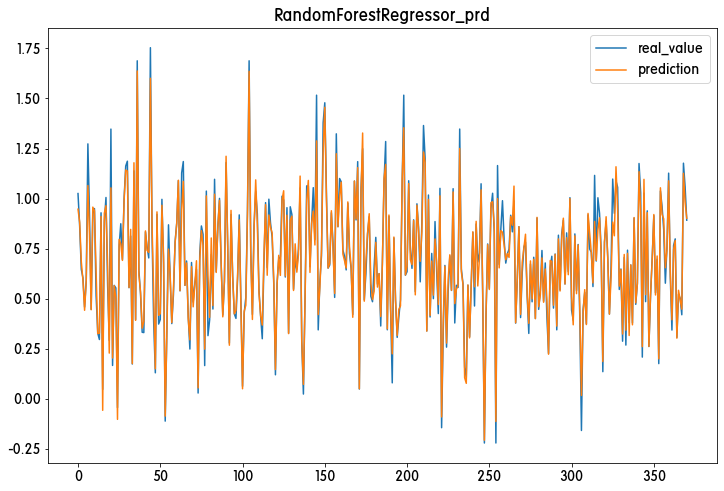

In [403]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(12,8))
plt.plot(seoul_ga_sc_te_y_in,label='real_value')
plt.plot(RandomForestRegressor_prd,label='prediction')
ax.set_title('RandomForestRegressor_prd')
plt.legend()


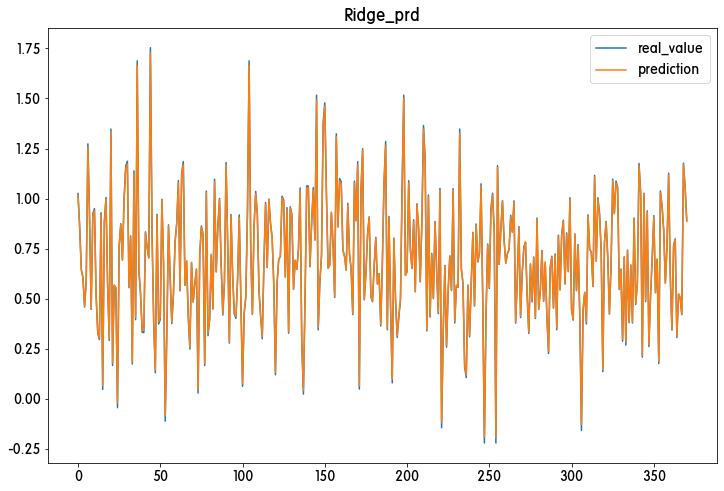

In [404]:
f,ax=plt.subplots(figsize=(12,8))
plt.plot(seoul_ga_sc_te_y_in,label='real_value')
plt.plot(Ridge_prd,label='prediction')
ax.set_title('Ridge_prd')
plt.legend()


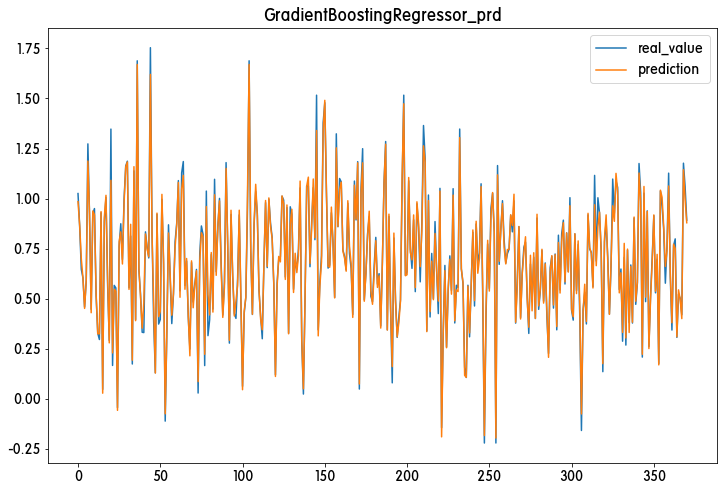

In [405]:
f,ax=plt.subplots(figsize=(12,8))
plt.plot(seoul_ga_sc_te_y_in,label='real_value')
plt.plot(GradientBoostingRegressor_prd,label='prediction')
ax.set_title('GradientBoostingRegressor_prd')
plt.legend()


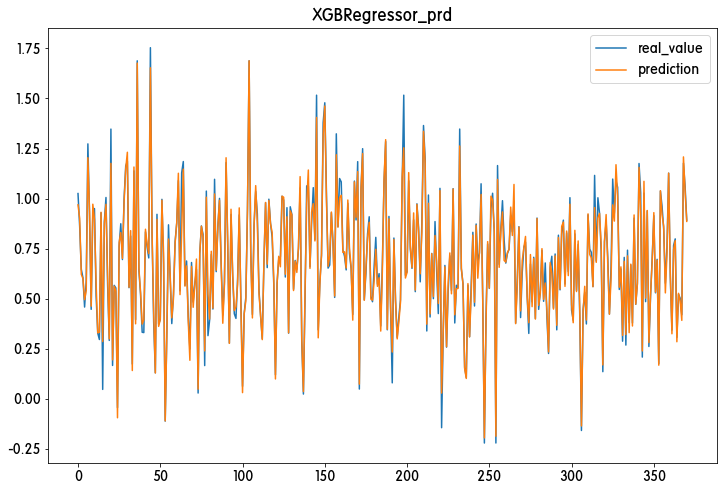

In [406]:
f,ax=plt.subplots(figsize=(12,8))
plt.plot(seoul_ga_sc_te_y_in,label='real_value')
plt.plot(XGBRegressor_prd,label='prediction')
ax.set_title('XGBRegressor_prd')
plt.legend()

In [300]:
# y값을 점수로 놓는다

y=seoul_ga_sc['점수']
del seoul_ga_sc['점수']

In [407]:
# Ridge 모델을 불러와서 착한가격업소의 점수를 예측한다

model_list_fit[0].fit(seoul_ga_sc,y)
Linear=model_list_fit[0].predict(seoul_cha_sc)

seoul_cha_sc['점수']=Linear

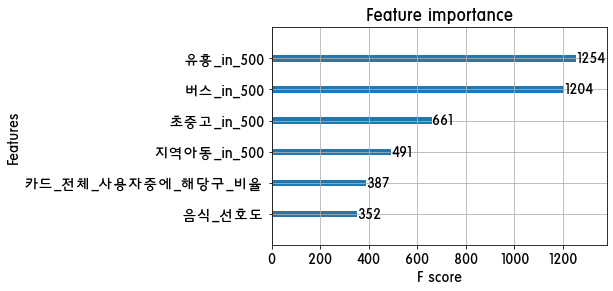

In [410]:
# 변수 중요도

del seoul_ga_sc['점수']

model=model_list_fit[4]
model.fit(seoul_ga_sc,y)
plot_importance(model)

# 500m안에 유흥업소하고 버스가 얼마나 있는지가 점수에 중요한 영향을 미치는거 같다.

In [169]:
seoul_cha_sc['점수'].describe()  # 예측한 착한가격 점수

count    326.000000
mean       0.430889
std        0.353326
min       -0.440062
25%        0.188078
50%        0.429499
75%        0.667414
max        1.424370
Name: 점수, dtype: float64

In [174]:
y.describe()  # 원래의 가맹점 점수

count    1852.000000
mean        0.657853
std         0.321694
min        -0.369792
25%         0.438920
50%         0.655146
75%         0.876160
max         1.765653
Name: 점수, dtype: float64

In [274]:
seoul_cha_sc[seoul_cha_sc['점수']<=-0.369792]

,초중고_in_500,버스_in_500,지역아동_in_500,유흥_in_500,음식_선호도,카드_전체_사용자중에_해당구_비율,점수
45,0.000000,0.37500,0.0,0.783422,0.495,0.042,-0.408422
46,0.000000,0.37500,0.0,0.783422,0.495,0.042,-0.408422
47,0.000000,0.37500,0.0,0.783422,0.495,0.042,-0.408422
48,0.000000,0.37500,0.0,0.783422,0.495,0.042,-0.408422
49,0.083333,0.37500,0.0,0.898396,0.495,0.042,-0.440062
76,0.000000,0.15625,0.0,0.537433,0.614,0.042,-0.381183


In [ ]:
# seoul_cha_sc['점수']=seoul_cha_sc[['초중고_in_500','버스_in_500','지역아동_in_500']].sum(axis=1)
# seoul_cha_sc['점수']=seoul_cha_sc['점수']-seoul_cha_sc['유흥_in_500']

In [271]:
# tr_y=seoul_ga_sc['점수']
# del seoul_ga_sc['점수']

In [275]:
y.describe()

count    1852.000000
mean        0.657853
std         0.321694
min        -0.369792
25%         0.438920
50%         0.655146
75%         0.876160
max         1.765653
Name: 점수, dtype: float64

In [290]:
# 보기 쉽게 점수를 맞춰주기 위해 숫자를 곱함

y2=y*2.831813499028405 
seoul_ga_sc_2=seoul_ga_sc*2.831813499028405 
seoul_cha_sc_2=seoul_cha_sc*2.831813499028405

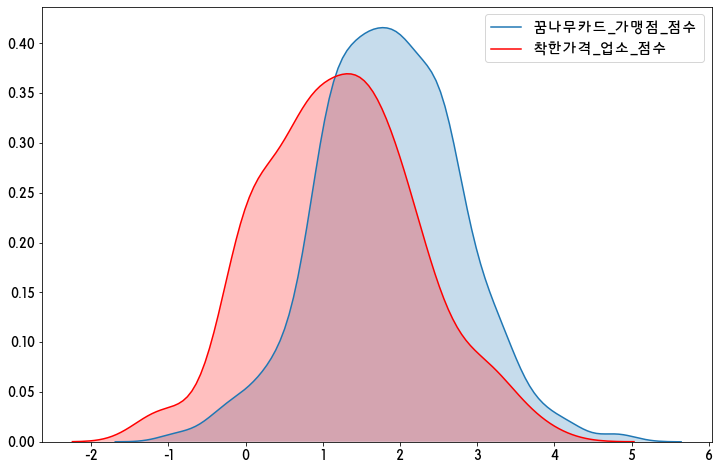

In [422]:
f,ax=plt.subplots(figsize=(12,8))
sns.kdeplot(y2,shade=True,label='꿈나무카드_가맹점_점수')
sns.kdeplot(seoul_cha_sc_2['점수'],shade=True,color='Red',label='착한가격_업소_점수')

In [301]:
seoul_cha_sc_2[seoul_cha_sc_2['점수']<=-1.047181]  # 가맹점의 최저점보다 낮은 착한가격업소

,초중고_in_500,버스_in_500,지역아동_in_500,유흥_in_500,음식_선호도,카드_전체_사용자중에_해당구_비율,점수
45,0.000000,1.061930,0.0,2.218506,1.401748,0.118936,-1.156576
46,0.000000,1.061930,0.0,2.218506,1.401748,0.118936,-1.156576
47,0.000000,1.061930,0.0,2.218506,1.401748,0.118936,-1.156576
48,0.000000,1.061930,0.0,2.218506,1.401748,0.118936,-1.156576
49,0.235984,1.061930,0.0,2.544089,1.401748,0.118936,-1.246175
76,0.000000,0.442471,0.0,1.521910,1.738733,0.118936,-1.079440


In [321]:
print('가맹점의 최저점보다 낮은 착한가격업소 개수 : ',len(seoul_cha_sc_2[seoul_cha_sc_2['점수']<=-1.047181]))

print('가맹점의 최저점보다 낮은 착한가격업소 비율 : '
      + str(len(seoul_cha_sc_2[seoul_cha_sc_2['점수']<=-1.047181])/len(seoul_cha_sc_2)*100)+' %')

가맹점의 최저점보다 낮은 착한가격업소 개수 :  6
가맹점의 최저점보다 낮은 착한가격업소 비율 : 1.8404907975460123 %


In [ ]:
# 6개의 착한가격업소는 조금 생각해볼 필요가 있지만 나머지는 가맹점으로 확대해도 좋을듯하다